In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils #comment
np.random.seed(10)

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()


In [5]:
print('train data = ', len(x_test_image), len(y_test_label))

train data =  10000 10000


In [6]:
print('x_train_image',x_train_image.shape,x_test_image.shape)

x_train_image (60000, 28, 28) (10000, 28, 28)


In [7]:
print('y_train_label',y_train_label.shape,y_test_label.shape)

y_train_label (60000,) (10000,)


In [8]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  =  x_test_image.reshape(10000,784).astype('float32')

In [9]:
x_Train[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
x_Train_normalize = x_Train / 255.0
x_Test_normalize = x_Test / 255.0

In [11]:
y_test_label[3]

0

In [12]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [13]:
y_TestOneHot[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=159, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))


In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 159)               159159    
_________________________________________________________________
dropout_3 (Dropout)          (None, 159)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
train_history = model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 81s - loss: 0.5114 - accuracy: 0.8393 - val_loss: 0.1498 - val_accuracy: 0.9538
Epoch 2/10
 - 66s - loss: 0.2005 - accuracy: 0.9413 - val_loss: 0.1059 - val_accuracy: 0.9684
Epoch 3/10
 - 63s - loss: 0.1515 - accuracy: 0.9571 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 4/10
 - 65s - loss: 0.1216 - accuracy: 0.9650 - val_loss: 0.0937 - val_accuracy: 0.9717
Epoch 5/10
 - 64s - loss: 0.1079 - accuracy: 0.9682 - val_loss: 0.0975 - val_accuracy: 0.9743
Epoch 6/10
 - 63s - loss: 0.0949 - accuracy: 0.9720 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 7/10
 - 63s - loss: 0.0838 - accuracy: 0.9749 - val_loss: 0.0798 - val_accuracy: 0.9786
Epoch 8/10
 - 59s - loss: 0.0750 - accuracy: 0.9779 - val_loss: 0.0837 - val_accuracy: 0.9778
Epoch 9/10
 - 38s - loss: 0.0734 - accuracy: 0.9782 - val_loss: 0.0734 - val_accuracy: 0.9800
Epoch 10/10
 - 31s - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0798 - val_accuracy: 0.9778


In [20]:
from keras.models import load_model

model.save("model_from_web.h5")

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')
    plt.show()


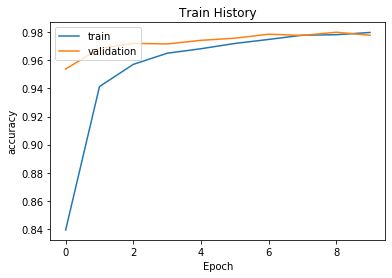

In [22]:
show_train_history(train_history,'accuracy','val_accuracy')

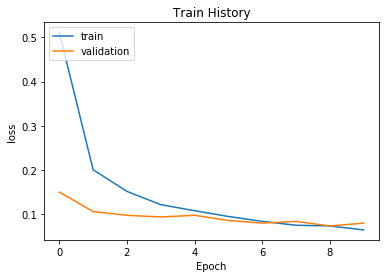

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 4s 352us/step

accuracy =  0.9807999730110168


In [25]:
print(x_Test_normalize.shape)
print(y_TestOneHot.shape)

(10000, 784)
(10000, 10)


In [26]:
prediction = model.predict_classes(x_Test)

In [27]:
prediction[340:350]

array([3, 6, 1, 3, 8, 1, 0, 5, 1, 3], dtype=int64)

In [28]:
y_test_label[340:350]

array([5, 6, 1, 3, 8, 1, 0, 5, 1, 3], dtype=uint8)

In [29]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,0,2,0,1,2,1,1,0
1,0,1127,2,3,0,0,2,0,1,0
2,4,0,1013,0,1,0,1,11,2,0
3,0,0,2,998,0,1,0,6,2,1
4,1,1,2,0,961,0,3,4,0,10
5,2,0,0,7,1,872,4,1,2,3
6,5,2,1,0,9,4,934,0,3,0
7,1,6,4,1,0,0,0,1013,0,3
8,4,2,4,11,8,4,0,6,926,9
